For this home assiment I was asked to analayse data, using only numpy, panda and matplotlib

In [ ]:
from IPython import get_ipython
get_ipython().magic('reset -sf') #clearing all data from Q1

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import files # upload and save files
import io # import/output files
uploaded = files.upload()
rawdata = pd.read_csv(io.BytesIO(uploaded['factory_test_data.csv']))

Saving factory_test_data.csv to factory_test_data.csv




**REMEMBER TO CHANGE TO GIT UPLOAD!**

 **Part 1 - Data Loading and Description**

Load the data from 'factory_test.csv' and provide a description of its contents

In [ ]:
rawdata.describe()

# Replace empty lists with NaN (modifies 'rawdata' in place)
rawdata.replace('[]', np.nan, inplace=True)

# Convert all applicable columns to numeric data type
data = rawdata.apply(pd.to_numeric)

data.describe()

,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
count,51.000000,47.0,47.000000,47.0,47.000000,47.0,47.000000,47.0,47.000000
mean,1504.960784,18.0,17.425957,14.0,13.452340,12.0,11.673830,9.0,8.346383
std,71.384861,0.0,4.275727,0.0,0.123732,0.0,1.226748,0.0,0.295807
min,1487.000000,18.0,7.870000,14.0,13.190000,12.0,9.100000,9.0,7.810000
25%,1493.000000,18.0,14.825000,14.0,13.395000,12.0,10.965000,9.0,8.195000
50%,1495.000000,18.0,18.000000,14.0,13.450000,12.0,11.500000,9.0,8.330000
75%,1497.000000,18.0,20.250000,14.0,13.520000,12.0,12.355000,9.0,8.555000
max,2004.000000,18.0,25.260000,14.0,13.990000,12.0,14.560000,9.0,9.160000


while looking at the raw data i noticed we have some data point with [] and not NaN , and that X values were not numeric values, so I did basic manipulations and changed the data to workable data.

# **2. Data Visualization and Explanation**

Visualize the data and explain the observed patterns or trends.

In [ ]:
def plot4(data,title):
  fig, ax = plt.subplots(2, 2)

  ax[0, 0].scatter(data.X2, data.Y2 )
  ax[0, 0].set_xlabel('X2')
  ax[0, 0].set_ylabel('Y2')
  tl1=('Y2 mean={}, Y2 STD={}, Y2 median={}'.format(round(data.Y2.mean(),4) , round(data.Y2.std(),4), round(data.Y2.median(),4)))
  ax[0, 0].set_title(tl1,fontsize=7)


  ax[0, 1].scatter(data.X3, data.Y3)
  ax[0, 1].set_xlabel('X3')
  ax[0, 1].set_ylabel('Y3')
  tl2=('Y3 mean={}, Y3 STD={}, Y3 median={}'.format(round(data.Y3.mean(),4) , round(data.Y3.std(),4), round(data.Y3.median(),4)))
  ax[0, 1].set_title(tl2,fontsize=7)

  ax[1, 0].scatter(data.X4, data.Y4)
  ax[1, 0].set_xlabel('X4')
  ax[1, 0].set_ylabel('Y4')
  tl3=('Y4 mean={}, Y4 STD={}, Y4 median={}'.format(round(data.Y4.mean(),4) , round(data.Y4.std(),4), round(data.Y4.median(),4)))
  ax[1, 0].set_title(tl3,fontsize=7)

  ax[1, 1].scatter(data.X5, data.Y5)
  ax[1, 1].set_xlabel('X5')
  ax[1, 1].set_ylabel('Y5')
  tl4=('Y5 mean={}, Y5 STD={}, Y5 median={}'.format(round(data.Y5.mean(),4) , round(data.Y5.std(),4), round(data.Y5.median(),4)))
  ax[1, 1].set_title(tl4,fontsize=7)

  fig.subplots_adjust(bottom=0.2, right=1.5, top=0.9, wspace=0.4, hspace=0.4)
  plt.suptitle(title)
  plt.tight_layout()
  plt.show()

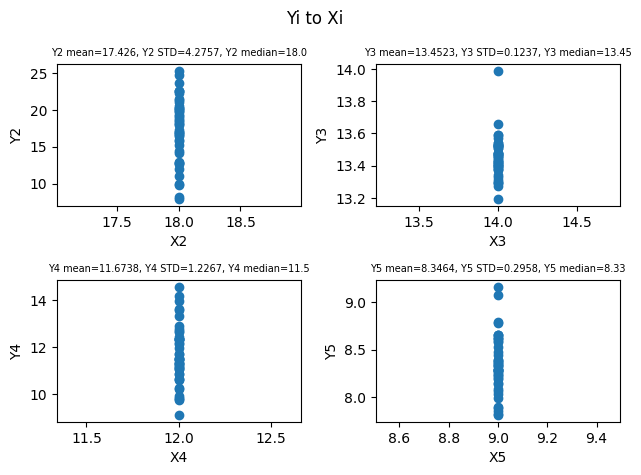

In [ ]:
plot4(data,'Yi to Xi')

Looking at my initial data visualiztion - we can see that Yi changes but Xi is the same for all samples, that indicates that Xi might be a goal of a measurment, the background of the enviorment or any other measurment relevant to our data.
looking at our data we see that Yi we see the mean and median are same (or close) to the value of Xi for all i, but the destribution around it changes.
Y2 is destributed roughly even around X2, and Y4 and X4 are the same.
Y3 is always smaller then X3, and besides one point it is even smaller then one יחידת מידה  from it.
Y5 is destributed to be smaller then X5, with a small amount of points that are bigger than X5. they might be outliars.

In [ ]:

# Find rows with missing values
missing_rows = data[data.isnull().any(axis=1)]

# Remove rows with missing values
data = data.dropna()

#now we have smaller counck of data, with less nulls



Y1 being an independent variable with out a corrosponding X might indicate it changes acording to all X's, knowing our X might be goals or enviormant data- lets check the connection between Y1 and Yi

In [ ]:
def plot4_2(data,title):
  fig, ax = plt.subplots(2, 2)

  ax[0, 0].scatter(data.Y2, data.Y1 )
  ax[0, 0].set_xlabel('Y2 (X2={})'.format(data.X2[0]))
  ax[0, 0].set_ylabel('Y1')
  tl1=('Y2 mean={}, Y2 STD={}, Y2 median={}'.format(round(data.Y2.mean(),4) , round(data.Y2.std(),4), round(data.Y2.median(),4)))
  ax[0, 0].set_title(tl1,fontsize=7)


  ax[0, 1].scatter(data.Y3, data.Y1)
  ax[0, 1].set_xlabel('Y3 (X3={})'.format(data.X3[0]))
  ax[0, 1].set_ylabel('Y1')
  tl2=('Y3 mean={}, Y3 STD={}, Y3 median={}'.format(round(data.Y3.mean(),4) , round(data.Y3.std(),4), round(data.Y3.median(),4)))
  ax[0, 1].set_title(tl2,fontsize=7)

  ax[1, 0].scatter(data.Y4, data.Y1)
  ax[1, 0].set_xlabel('Y4 (X4={})'.format(data.X4[0]))
  ax[1, 0].set_ylabel('Y1')
  tl3=('Y4 mean={}, Y4 STD={}, Y4 median={}'.format(round(data.Y4.mean(),4) , round(data.Y4.std(),4), round(data.Y4.median(),4)))
  ax[1, 0].set_title(tl3,fontsize=7)

  ax[1, 1].scatter(data.Y5, data.Y1)
  ax[1, 1].set_xlabel('Y5 (X5={})'.format(data.X5[0]))
  ax[1, 1].set_ylabel('Y1')
  tl4=('Y5 mean={}, Y5 STD={}, Y5 median={}'.format(round(data.Y5.mean(),4) , round(data.Y5.std(),4), round(data.Y5.median(),4)))
  ax[1, 1].set_title(tl4,fontsize=7)

  fig.subplots_adjust(bottom=0.2, right=1.5, top=0.9, wspace=0.4, hspace=0.4)
  plt.suptitle(title)
  plt.tight_layout()
  plt.show()


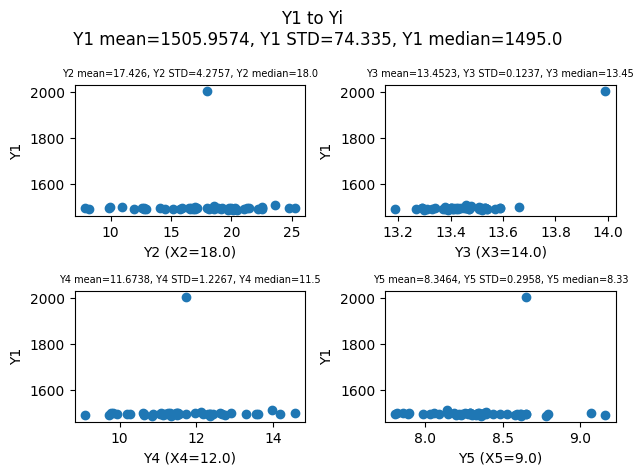

In [ ]:
title = ('Y1 to Yi \n Y1 mean={}, Y1 STD={}, Y1 median={}'.format(round(data.Y1.mean(),4) , round(data.Y1.std(),4), round(data.Y1.median(),4)))
plot4_2(data,title)

# **we can see we have one Y1 value being an obviouse ourliar, lets remove it and look again at our data.**



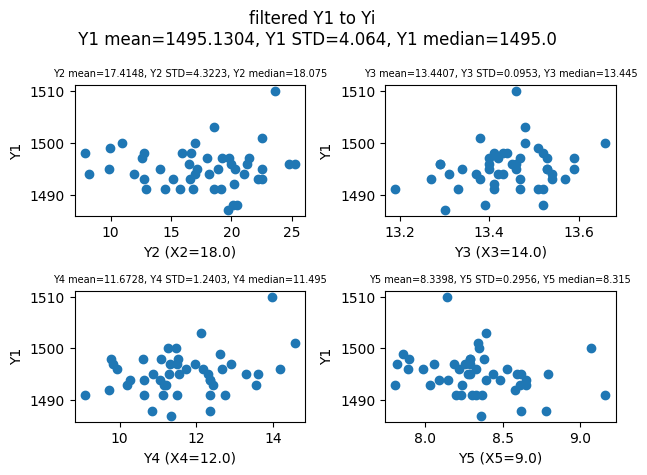

In [ ]:
# Identify the outlier value
outlier_value = max(data.Y1)

#Filter the outlier
filtered_data = data[data['Y1'] != outlier_value]

#new plot without the outlier
title = ('filtered Y1 to Yi \n Y1 mean={}, Y1 STD={}, Y1 median={}'.format(round(filtered_data.Y1.mean(),4) , round(filtered_data.Y1.std(),4), round(filtered_data.Y1.median(),4)))
plot4_2(filtered_data,title)

we can see our Y1 STD is a lot smaller now, while the rest of the statistics are almost the same, and our data looks a lot better - we can start actually looking for tends and patterns, lets look at the way the data goes around the X value with a histogram and look for the CI

the central

95% Confidence Interval = (8.411250000000003 , 24.58875)


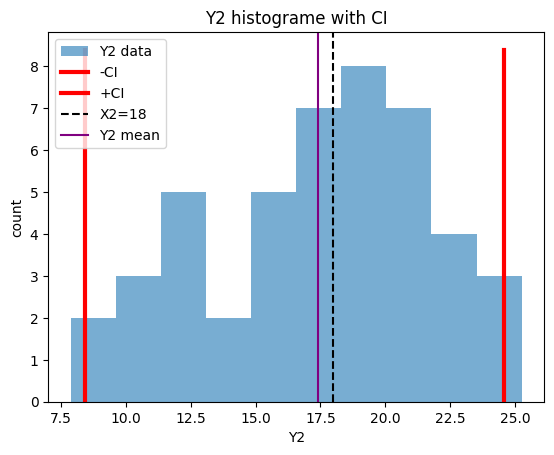

In [ ]:

#finding the CI
conf = 0.95
ci95 = np.percentile(filtered_data.Y2, [100*(1-conf)/2,100*(1-(1-conf)/2)])

print('95% Confidence Interval = (' + str(ci95[0]) + ' , ' + str(ci95[1]) + ')')

plt.hist(filtered_data.Y2, alpha = 0.6, label = 'Y2')
plt.plot([ci95,ci95], plt.gca().get_ylim(),color = 'red', lw = 3, label = 'CI')
plt.axvline(x=filtered_data.X2[0], color='black', linestyle='--')
plt.axvline(filtered_data.Y2.mean(), color='purple', linestyle='solid')
title = 'Y2 histograme with CI'
plt.title(title)
plt.xlabel('Y2') , plt.ylabel('count')
leg=['Y2 data','-CI','+CI','X2=18','Y2 mean']
plt.legend(leg)
plt.show()

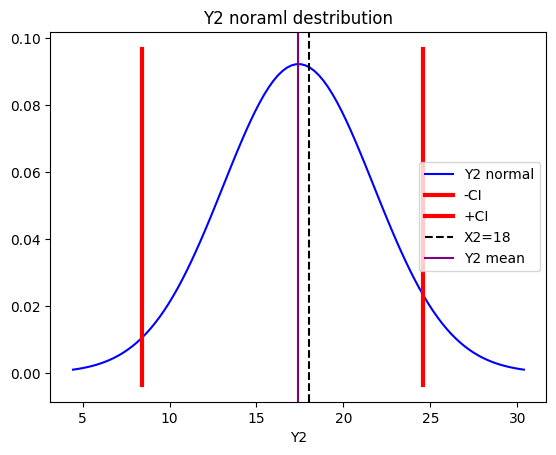

In [ ]:
#assuming my data destributes noramly, lets create the normal destribution
y2mean=filtered_data.Y2.mean()
y2std=filtered_data.Y2.std()
x = np.linspace(y2mean - 3 * y2std, y2mean + 3 * y2std, 100)
y = (1 / (y2std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - y2mean) / y2std) ** 2)

plt.plot(x, y, color='blue')
plt.plot([ci95,ci95], plt.gca().get_ylim(),color = 'red', lw = 3, label = 'CI')
plt.axvline(x=filtered_data.X2[0], color='black', linestyle='--')
plt.axvline(filtered_data.Y2.mean(), color='purple', linestyle='solid')
plt.xlabel('X2')
#plt.ylabel('Y2')
title = 'Y2 noraml destribution'
plt.title(title)
plt.xlabel('Y2')
leg=['Y2 normal','-CI','+CI','X2=18','Y2 mean']
plt.legend(leg)
plt.show()

assuming our data for Y2 does destribute normaly , and with a confidence interval of 95% we can look at data over 24.56 and under 8.45 as outliers, that will help us later on looking at out new devices.

95% Confidence Interval = (1488.0 , 1502.75)


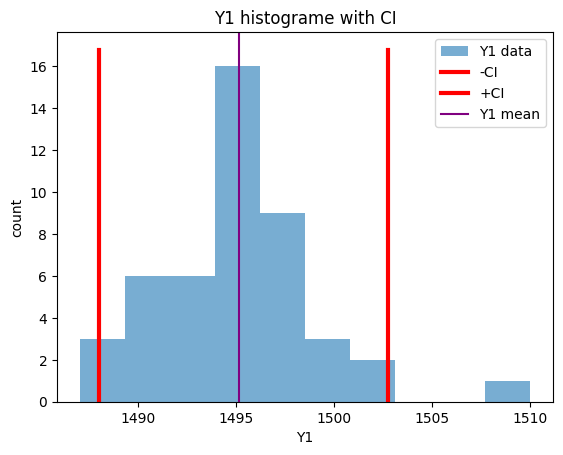

In [ ]:
#finding the CI
conf = 0.95
ci95 = np.percentile(filtered_data.Y1, [100*(1-conf)/2,100*(1-(1-conf)/2)])

print('95% Confidence Interval = (' + str(ci95[0]) + ' , ' + str(ci95[1]) + ')')

plt.hist(filtered_data.Y1, alpha = 0.6, label = 'Y1')
plt.plot([ci95,ci95], plt.gca().get_ylim(),color = 'red', lw = 3, label = 'CI')
#plt.axvline(x=filtered_data.X2[0], color='black', linestyle='--')
plt.axvline(filtered_data.Y1.mean(), color='purple', linestyle='solid')
title = 'Y1 histograme with CI'
plt.title(title)
plt.xlabel('Y1') , plt.ylabel('count')
leg=['Y1 data','-CI','+CI','Y1 mean']
plt.legend(leg)
plt.show()

lets do the same with Y4

95% Confidence Interval = (9.73625 , 14.15375)


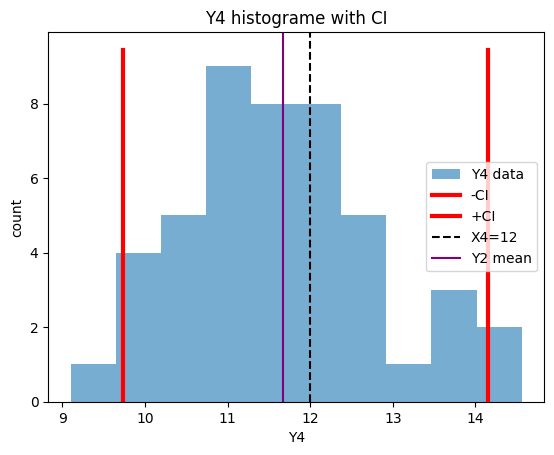

In [ ]:
#finding the CI
ci95 = np.percentile(filtered_data.Y4, [100*(1-conf)/2,100*(1-(1-conf)/2)])

print('95% Confidence Interval = (' + str(ci95[0]) + ' , ' + str(ci95[1]) + ')')

plt.hist(filtered_data.Y4, alpha = 0.6, label = 'Y2')
plt.plot([ci95,ci95], plt.gca().get_ylim(),color = 'red', lw = 3, label = 'CI')
plt.axvline(x=filtered_data.X4[0], color='black', linestyle='--')
plt.axvline(filtered_data.Y4.mean(), color='purple', linestyle='solid')
title = 'Y4 histograme with CI'
plt.title(title)
plt.xlabel('Y4') , plt.ylabel('count')
leg=['Y4 data','-CI','+CI','X4=12','Y2 mean']
plt.legend(leg)
plt.show()

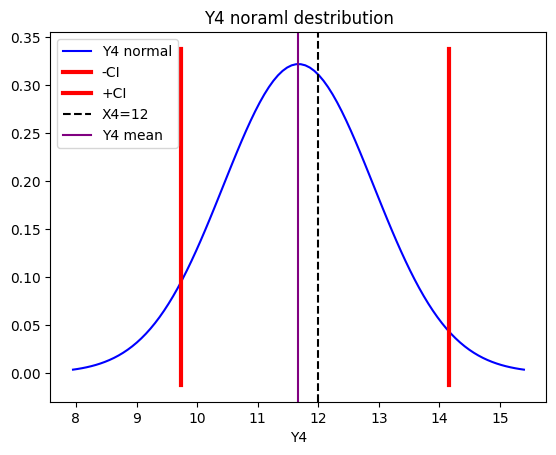

In [ ]:
#assuming my data destributes noramly, lets create the normal destribution
y4mean=filtered_data.Y4.mean()
y4std=filtered_data.Y4.std()
x = np.linspace(y4mean - 3 * y4std, y4mean + 3 * y4std, 100)
y = (1 / (y4std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - y4mean) / y4std) ** 2)

plt.plot(x, y, color='blue')
plt.plot([ci95,ci95], plt.gca().get_ylim(),color = 'red', lw = 3, label = 'CI')
plt.axvline(x=filtered_data.X4[0], color='black', linestyle='--')
plt.axvline(filtered_data.Y4.mean(), color='purple', linestyle='solid')
plt.xlabel('X4')
#plt.ylabel('Y2')
title = 'Y4 noraml destribution'
plt.title(title)
plt.xlabel('Y4')
leg=['Y4 normal','-CI','+CI','X4=12','Y4 mean']
plt.legend(leg)
plt.show()

looking at Y4 histogram we can behaves very similar to normal destribution so again I ploted it as a normal destribution and the CI is at 9.7375 , 14.1485 - it will help us see the outliars

looking at Y3 and Y5 , they do not reach the Xi value (or very close to is) lets look at the histogram of the data

95% Confidence Interval = (13.272499999999999 , 13.59)


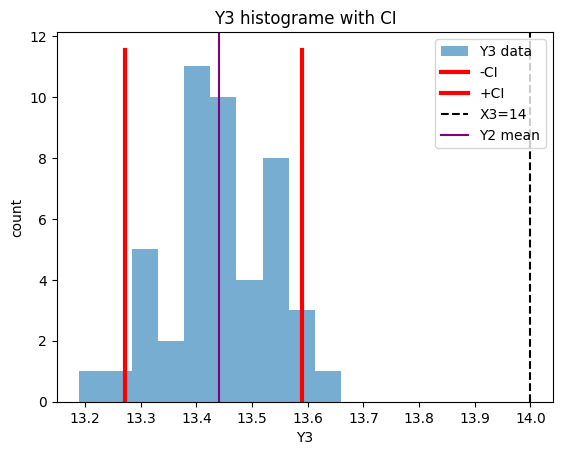

In [ ]:
#finding the CI Y3
ci95 = np.percentile(filtered_data.Y3, [100*(1-conf)/2,100*(1-(1-conf)/2)])

print('95% Confidence Interval = (' + str(ci95[0]) + ' , ' + str(ci95[1]) + ')')

plt.hist(filtered_data.Y3, alpha = 0.6, label = 'Y3')
plt.plot([ci95,ci95], plt.gca().get_ylim(),color = 'red', lw = 3, label = 'CI')
plt.axvline(x=filtered_data.X3[0], color='black', linestyle='--')
plt.axvline(filtered_data.Y3.mean(), color='purple', linestyle='solid')
title = 'Y3 histograme with CI'
plt.title(title)
plt.xlabel('Y3') , plt.ylabel('count')
leg=['Y3 data','-CI','+CI','X3=14','Y2 mean']
plt.legend(leg)
plt.show()

95% Confidence Interval = (7.825 , 9.035)


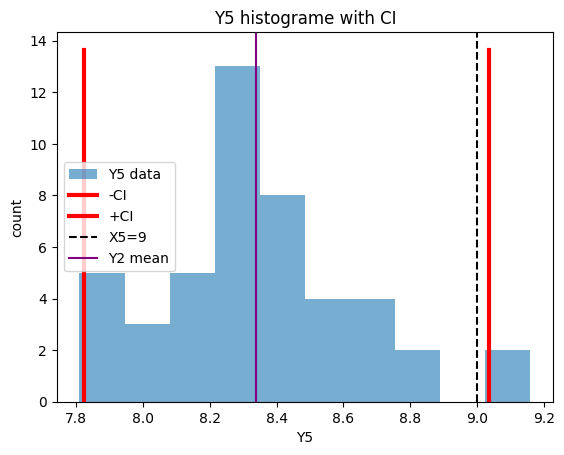

In [ ]:
#finding the CI Y5
ci95 = np.percentile(filtered_data.Y5, [100*(1-conf)/2,100*(1-(1-conf)/2)])

print('95% Confidence Interval = (' + str(ci95[0]) + ' , ' + str(ci95[1]) + ')')

plt.hist(filtered_data.Y5, alpha = 0.6, label = 'Y5')
plt.plot([ci95,ci95], plt.gca().get_ylim(),color = 'red', lw = 3, label = 'CI')
plt.axvline(x=filtered_data.X5[0], color='black', linestyle='--')
plt.axvline(filtered_data.Y5.mean(), color='purple', linestyle='solid')
title = 'Y5 histograme with CI'
plt.title(title)
plt.xlabel('Y5') , plt.ylabel('count')
leg=['Y5 data','-CI','+CI','X5=9','Y2 mean']
plt.legend(leg)
plt.show()

they both look like they might destribut normaly - but for Y3 the X3 value is out of the CI zone, while for Y5 it is very close to the CI on the right side.
this might indicate that for Y5 the X value might be a stop signal - for example a max tempature that the device can reach after a few uses.
for Y3 the X value is out of the CI, but the numbers themselves are very close (less then 1 diffrence between them). this might be a measurment of diffrence between the inside and outside of the device.
again - using the CI we can check for outliers.


to understand Y1 we need to look at it as a veriable of all other Y values. lets look at a linear regression of Y1(Yi)

In [ ]:
def linreg(x,y):
  # calculate using formulas
  b1 = np.dot((x-x.mean()),(y-y.mean()))/ np.dot((x-x.mean()),(x-x.mean()))
  b0 = y.mean()-b1*x.mean()

  print('b0 = {} , b1 = {}'.format(round(b0,4),round(b1,4)))
  yhat = b0+b1*x
  # effect size for regression model

  SSreg = np.dot((yhat-y.mean()),(yhat-y.mean()))
  SSres = np.dot((y-yhat),(y-yhat))
  SStot = np.dot((y-y.mean()),(y-y.mean()))

  R2 = SSreg/SStot

  f2 = SSreg/SSres

  print('R2 = {} , f2 = {}'.format(round(R2,4),round(f2,4)))
  return  b0, b1 , R2, f2


In [ ]:
def plotreg(x,y,b0,b1,title,xlab,ylab):
  yhat = b0+b1*x
  plt.scatter(x,y)
  plt.plot(x,yhat, color = 'lime')
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.title(title)
  leg=['data points','reggression']
  plt.legend(leg)
  plt.show()


lets look at our regressions for Y1(Yi)

b0 = 1494.8404 , b1 = 0.0167
R2 = 0.0003 , f2 = 0.0003


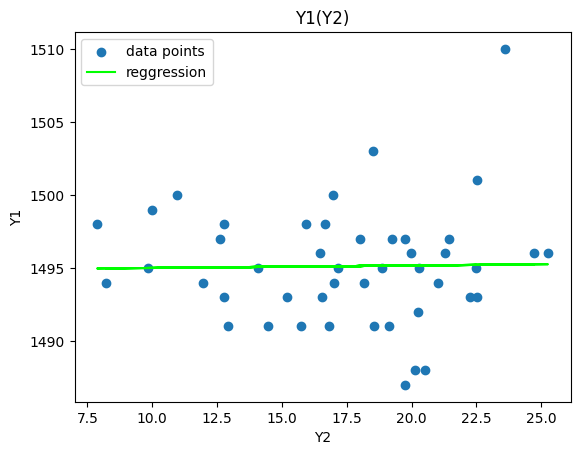

In [ ]:
b0,b1,R2,f2 = linreg(filtered_data.Y2,filtered_data.Y1)
plotreg(filtered_data.Y2,filtered_data.Y1,b0,b1,'Y1(Y2)','Y2','Y1')

R2 value is very low , the regrassion does not say a lot.
lets check for other data

b0 = 1364.4291 , b1 = 9.7243
R2 = 0.052 , f2 = 0.0549


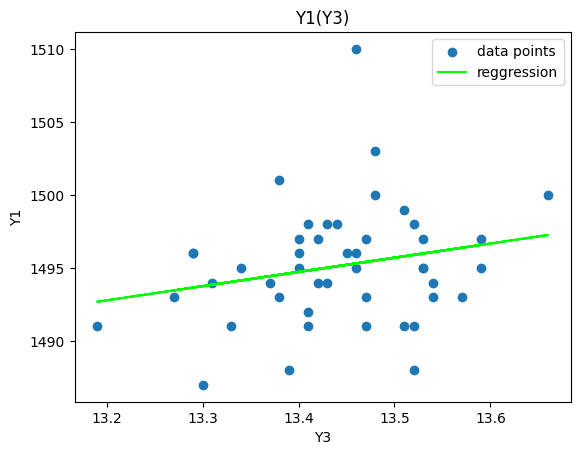

In [ ]:
b0,b1,R2,f2 = linreg(filtered_data.Y3,filtered_data.Y1)
plotreg(filtered_data.Y3,filtered_data.Y1,b0,b1,'Y1(Y3)','Y3','Y1')

still very low R2

b0 = 1483.8675 , b1 = 0.9649
R2 = 0.0867 , f2 = 0.0949


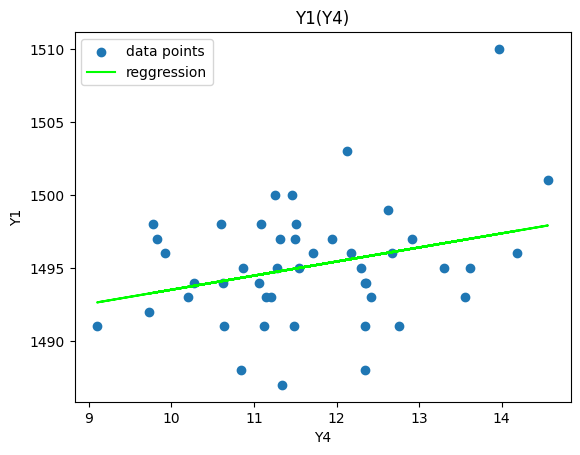

In [ ]:
b0,b1,R2,f2 = linreg(filtered_data.Y4,filtered_data.Y1)
plotreg(filtered_data.Y4,filtered_data.Y1,b0,b1,'Y1(Y4)','Y4','Y1')

b0 = 1522.0295 , b1 = -3.2254
R2 = 0.055 , f2 = 0.0582


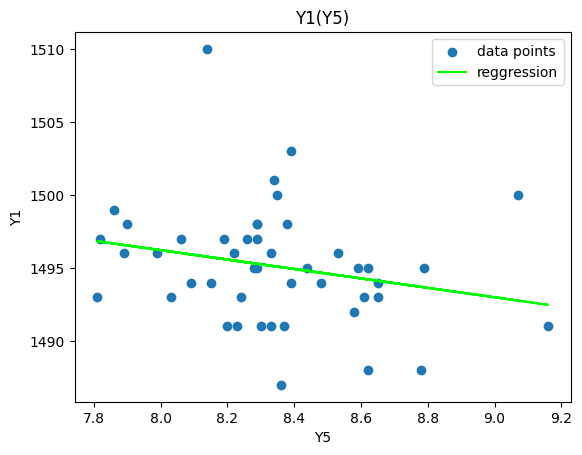

In [ ]:
b0,b1,R2,f2 = linreg(filtered_data.Y5,filtered_data.Y1)
plotreg(filtered_data.Y5,filtered_data.Y1,b0,b1,'Y1(Y5)','Y5','Y1')

after looking at those regressions i am not sure they are relevant. the r2 value was very low for all of them.


In [ ]:
# try linear multivariate rgression

y = filtered_data.Y1

X = np.array([np.ones(len(filtered_data.Y1)), filtered_data.Y2, filtered_data.Y3,filtered_data.Y4,filtered_data.Y5])
X = X.T

b = np.linalg.inv(X.T@X)@X.T@y

yhat = np.dot(X,b)

Syx2 = (y-yhat).T@(y-yhat)/(len(y)-5)

print('b0 = {} , b1 = {} , b2 = {}, b3 = {}, b4= {}, Syx2 = {}'.format(round(b[0],4),round(b[1],4),round(b[2],4),round(b[3],4),round(b[4],4),round(Syx2,4)))

SSreg = np.dot((yhat-y.mean()),(yhat-y.mean()))
vreg = 5-1
MSreg = SSreg/vreg

SSres = np.dot((yhat-y),(yhat-y))
vres = len(y)-5
MSres = SSres/vres

R2 = SSreg/(SSreg+SSres)
print('R2 = {} '.format(round(R2,4)))


b0 = 1379.5299 , b1 = 0.0202 , b2 = 9.4106, b3 = 0.8214, b4= -2.4969, Syx2 = 15.0975
R2 = 0.1671 


still not good, but it still gave us some data.


4. Data Exploration
You have also received another file called ‘new_devices.csv’ containing data for 3 additional devices. Please rank these new devices based on their probability of belonging to the sample group

I am going to do that based on if they fall within the CI of our Yi data, for each one they fall within they will recive 1 point, 5 points being fits in our sample, 3-5 i will check the distance from our CI and re evaluate and less then 3 i will assume the new measurmant came from outside my sample.

In [ ]:
#finding the CI of all
conf = 0.95
ci95_1 = np.percentile(filtered_data.Y1, [100*(1-conf)/2,100*(1-(1-conf)/2)])
ci95_2 = np.percentile(filtered_data.Y2, [100*(1-conf)/2,100*(1-(1-conf)/2)])
ci95_3 = np.percentile(filtered_data.Y3, [100*(1-conf)/2,100*(1-(1-conf)/2)])
ci95_4 = np.percentile(filtered_data.Y4, [100*(1-conf)/2,100*(1-(1-conf)/2)])
ci95_5 = np.percentile(filtered_data.Y5, [100*(1-conf)/2,100*(1-(1-conf)/2)])

ci95_all=[ci95_1,ci95_2,ci95_3,ci95_4,ci95_5]

In [ ]:
from google.colab import files # upload and save files
import io # import/output files
uploaded = files.upload()
new_devices = pd.read_csv(io.BytesIO(uploaded['new_devices.csv']))


Saving new_devices.csv to new_devices.csv


In [ ]:
new_devices = new_devices.apply(pd.to_numeric)

new_devices.describe()

,ID,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
count,3.0,3.000000,3.0,3.000000,3.0,3.000000,3.0,3.000000,3.0,3.000000
mean,2.0,1516.333333,18.0,17.313333,14.0,13.460000,12.0,11.483333,9.0,8.233333
std,1.0,35.232561,0.0,1.089602,0.0,0.081854,0.0,0.187705,0.0,0.176163
min,1.0,1495.000000,18.0,16.150000,14.0,13.390000,12.0,11.280000,9.0,8.030000
25%,1.5,1496.000000,18.0,16.815000,14.0,13.415000,12.0,11.400000,9.0,8.180000
50%,2.0,1497.000000,18.0,17.480000,14.0,13.440000,12.0,11.520000,9.0,8.330000
75%,2.5,1527.000000,18.0,17.895000,14.0,13.495000,12.0,11.585000,9.0,8.335000
max,3.0,1557.000000,18.0,18.310000,14.0,13.550000,12.0,11.650000,9.0,8.340000


In [ ]:
def checkinside(data,ci95_all):
  score=0
  is_between=0
  if is_between = np.logical_and(data.Y1 > ci95_all.ci95_1[0], x < ci95_all.ci95_1[1])
    score=score+1
  if is_between = np.logical_and(x > ci95_all.ci95_2[0], x < ci95_all.ci95_2[1])
    score=score+1
  if is_between = np.logical_and(x > ci95_all.ci95_3[0], x < ci95_all.ci95_3[1])
    score=score+1
  if is_between = np.logical_and(x > ci95_all.ci95_4[0], x < ci95_all.ci95_4[1])
    score=score+1
  if is_between = np.logical_and(x > ci95_all.ci95_5[0], x < ci95_all.ci95_5[1])
    score=score+1